In [102]:
import networkx
from ipywidgets import HTML
import ipyleaflet as ipl
import osmnx as ox
ox.config(use_cache=True, log_console=True)
import time 
import pandas as pd

/var/folders/_r/l_8sp0rj1n11c1kmsxmnzppr0000gn/T/ipykernel_84663/1725095544.py:5: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [2]:
################################################################
## UNCOMMENT WHEN YOU WANT TO LOAD THE GRAPH DATA AND SAVE IT ##
################################################################

#graph = ox.graph_from_place('Amsterdam, the Netherlands')
#ox.io.save_graphml(graph, filepath='amsterdam.graphml', gephi=False, encoding='utf-8')

url = 'tramstops.csv'
source_df = pd.read_csv(url, delimiter=';')

##########
## TEST ##
##########

source_df.head()

,Volgorde,Naam,Modaliteit,Lijn,Lijn_select,RADIUS,Label,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT,Unnamed: 11
0,1,Dijkgraafplein,Tram,17 | 27,17|27,5,17 | 27 - Dijkgraafplein,POINT(4.786911 52.355548),POINT(52.355548 4.786911),4.786911,52.355548,NaN
1,2,Baden Powellweg,Tram,17 | 27,17|27,5,17 | 27 - Baden Powellweg,POINT(4.791584 52.356492),POINT(52.356492 4.791584),4.791584,52.356492,NaN
2,3,Hoekenes,Tram,17 | 27,17|27,5,17 | 27 - Hoekenes,POINT(4.799095 52.358004),POINT(52.358004 4.799095),4.799095,52.358004,NaN
3,4,Osdorpplein West,Tram,17 | 27,17|27,5,17 | 27 - Osdorpplein West,POINT(4.803203 52.359418),POINT(52.359418 4.803203),4.803203,52.359418,NaN
4,5,Osdorpplein Oost,Tram,17 | 27,17|27,5,17 | 27 - Osdorpplein Oost,POINT(4.807557 52.359622),POINT(52.359622 4.807557),4.807557,52.359622,NaN


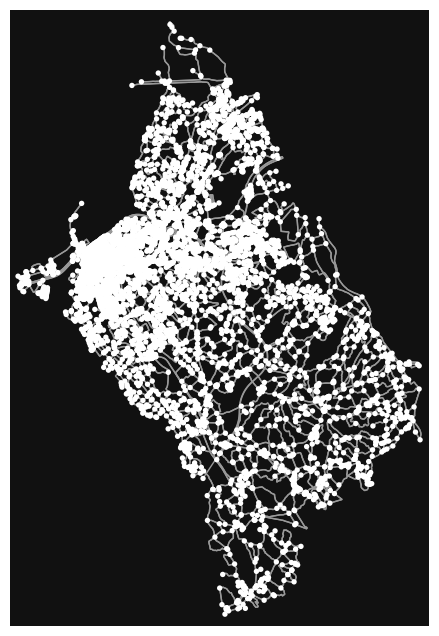

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [103]:
url = 'aveiro.graphml'
graph = ox.io.load_graphml(url)
ox.plot_graph(graph)

In [111]:
simulation = {
    "device_location":{
        "duration": 120,
        "stops": [
            {
                "label": "Reitoria UA",
                "lat": 40.631649455486816,
                "long": -8.657374926386364
            },
            {
                "label": "Autocarro Bar",
                "lat": 40.63442687018253, 
                "long": -8.657574824707662
            },
            {
                "label": "Hospital Aveiro",
                "lat": 40.635236027955024,
                "long": -8.65590872154504
            },
            {
                "label": "Cadeia Aveiro",
                "lat": 40.6368880975912,
                "long": -8.65708611819683
            },
            {
                "label": "Fábrica da Ciencia Viva",
                "lat": 40.63777642283235,
                "long": -8.658646959356998
            },
            {
                "label": "Rua da Pega",
                "lat": 40.62952643772836,
                "long": -8.65991719738882
            },
            {
                "label": "STIC UA",
                "lat": 40.62960224117823,
                "long": -8.658517543642327
            },
            {
                "label": "Aristides Hall",
                "lat": 40.62991505139128,
                "long": -8.65486302112794
            },
            {
                "label": "Ponte Crasto",
                "lat": 40.62852357440743, 
                "long": -8.656242006868082
            },
            {
                "label": "Residências UA",
                "lat": 40.63121656259592, 
                "long": -8.656323498254093
            },
            {
                "label": "Reitoria UA",
                "lat": 40.631649455486816,
                "long": -8.657374926386364
            }
        ]         
    }
}






In [112]:
#NEW
#NEW
# Function combining data from source, street network into dictionary
def create_dict(stops, graph):
    
    gdf_nodes = ox.graph_to_gdfs(graph)[0]
    
    all_path_nodes = []
    all_path_coord = []
    #all_sleeps = [0]
    
    # For every location in the route create an entry with a location_id, a start location and a path list from start to location
    c = 0
    for i in range (1, len(stops)):
        # Set Start and End
        y1, x1 = [stops[i-1]["lat"], stops[i-1]["long"]]
        y2, x2 = [stops[i]["lat"], stops[i]["long"]]

        # Compute the nodes in the path as well as their coordinates
        nodes = ox.nearest_nodes(G=graph, X=[x1, x2], Y=[y1, y2])
        path_nodes = networkx.shortest_path(graph, nodes[0], nodes[1])
        path_coord = gdf_nodes.loc[path_nodes][['x', 'y']]

        # save
        all_path_nodes += path_nodes
        all_path_coord += path_coord.values.tolist()
        
    # Compute distances between points
    #for i in range(1, len(all_path_nodes)):  
    #    prev_node = all_path_nodes[i-1]
    #    curr_node = all_path_nodes[i]
    #    shortest_path_length = networkx.shortest_path_length(graph, prev_node, curr_node, weight='length')
    #    # Compute the sleep time in each node, as to ensure an avg constant speed
    #    all_sleeps.append(speed * shortest_path_length)
    #    print(shortest_path_length)

    return list(zip(all_path_nodes, all_path_coord))
    
itinerary = create_dict(stops=simulation["device_location"]["stops"], graph=graph)


In [113]:
all_latitudes = [stop["lat"] for stop in simulation["device_location"]["stops"]]
all_longitudes = [stop["long"] for stop in simulation["device_location"]["stops"]]

ce = [sum(all_latitudes)/len(all_latitudes), sum(all_longitudes)/len(all_longitudes)]
sw = [
    min(all_latitudes) - 1.005 * abs(min(all_latitudes) - ce[0]),
    min(all_longitudes) - 1.005 * abs(min(all_longitudes) - ce[1])
]
nw = [
    max(all_latitudes) + 1.005 * abs(max(all_latitudes) - ce[0]),
    max(all_longitudes) + 1.005 * abs(max(all_longitudes) - ce[1])
]
#ne = [max(all_latitudes), max(all_longitudes)]

m1 = ipl.Map(center=ce)
m1.fit_bounds([sw, ne])
m1.layout.height = '800px'
m1


Map(center=[40.63240092698509, -8.657257249441868], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [93]:
'''
# Calculate map center and set bounds
latitudes = pd.Series(dtype="float64")
longitudes = pd.Series(dtype="float64")
for point in location_dict.values():
    lat, lon = pd.Series([point["location"][0]]), pd.Series(
        [point["location"][1]])
    latitudes = pd.concat([latitudes, lat])
    longitudes = pd.concat([longitudes, lon])
ce = [latitudes.mean(), longitudes.mean()]
sw = [latitudes.min(), longitudes.min()]
ne = [latitudes.max(), longitudes.max()]
m1 = ipl.Map(center=ce)
m1.fit_bounds([sw, ne])
m1.layout.height = '800px'

print(ce, sw, ne)
m1
'''

'\n# Calculate map center and set bounds\nlatitudes = pd.Series(dtype="float64")\nlongitudes = pd.Series(dtype="float64")\nfor point in location_dict.values():\n    lat, lon = pd.Series([point["location"][0]]), pd.Series(\n        [point["location"][1]])\n    latitudes = pd.concat([latitudes, lat])\n    longitudes = pd.concat([longitudes, lon])\nce = [latitudes.mean(), longitudes.mean()]\nsw = [latitudes.min(), longitudes.min()]\nne = [latitudes.max(), longitudes.max()]\nm1 = ipl.Map(center=ce)\nm1.fit_bounds([sw, ne])\nm1.layout.height = \'800px\'\n\nprint(ce, sw, ne)\nm1\n'

In [114]:
# Build route layer
trace = []
for node, coordinates in itinerary:
    trace.append(coordinates[::-1])
lines = ipl.Polyline(
    locations=trace,
    color="tomato",
    fill=False
)
m1.add_layer(lines)

# Build Stops
for stop in simulation["device_location"]["stops"]:
    circle = ipl.Circle(
        location=[stop["lat"], stop["long"]],
        radius=20,
        color="DimGray",
        fill_color="SkyBlue",
        fill=True,
        fill_opacity=0.85,
        popup=HTML(str(stop["label"]))
    )
    m1.add_layer(circle)
    
# Add marker to the beginning of the route
mark = ipl.Marker(location=[stops[0]["lat"], stops[0]["long"]])
m1.add_layer(mark)

In [115]:
sleep_count = len(itinerary) - 1
sleep_duration = simulation["device_location"]["duration"] / sleep_count

for node, coordinates in itinerary:
    mark.location = coordinates[::-1]
    time.sleep(sleep_duration)

1.2244897959183674
